In [2]:
import sys
import pandas as pd
import matplotlib as matplot
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
import sklearn
import statsmodels.api as sm

print("Python Version: {}".format(sys.version))
print("Numpy Version: {}".format(np.__version__))
print("Pandas Version: {}".format(pd.__version__))
print("Matplot Version: {}".format(matplot.__version__))
print("Seaborn Version: {}".format(sns.__version__))
print("Scipy Version: {}".format(scipy.__version__))
print("Scikit-learn Version: {}".format(sklearn.__version__))
print("Statsmodels API Version: {}".format(sm.__version__))

sns.set_theme(color_codes=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Python Version: 3.6.9 (default, Oct  8 2020, 12:12:24) 
[GCC 8.4.0]
Numpy Version: 1.19.5
Pandas Version: 1.1.5
Matplot Version: 3.2.2
Seaborn Version: 0.11.1
Scipy Version: 1.4.1
Scikit-learn Version: 0.22.2.post1
Statsmodels API Version: 0.10.2


# 1. Importing the Dataset

In [13]:
url = "./AimoScore_WeakLink_big_scores.xls"
champions = pd.read_excel(url)

ModuleNotFoundError: ignored

# 2 Create the first model
We are going to create our first model with all variables as pridictors and use it as our base line for comparison

In [ ]:
t = sm.add_constant(champions.drop(columns=["AimoScore","EstimatedScore"]), prepend=False)
model_base = sm.OLS(champions["AimoScore"],t).fit()
print(model_base.summary())

                            OLS Regression Results                            
Dep. Variable:              AimoScore   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     84.29
Date:                Mon, 15 Feb 2021   Prob (F-statistic):               0.00
Time:                        00:00:27   Log-Likelihood:                 979.47
No. Observations:                2094   AIC:                            -1887.
Df Residuals:                    2058   BIC:                            -1684.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
No_1_Angle_Deviation     -0.03

# 3 Analyzing the dataset
## 3.1 Finding identical columns

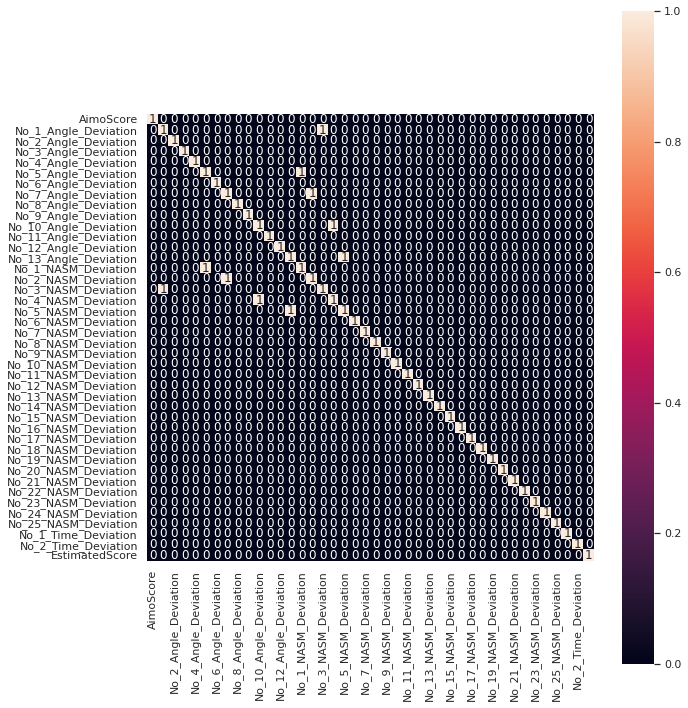

In [ ]:
corr = champions.corr()
fig, ax = plt.subplots(figsize=(10,12))  
plot = sns.heatmap((corr == 1),vmin=0, vmax=1, square=True,annot=True,ax=ax)
plt.show()

According to the heatmap these variables are the same:
 - No_1_NASM_Deviation & No_5_Angle_Deviation
 - No_2_NASM_Deviation & No_7_Angle_Deviation
 - No_3_NASM_Deviation & No_1_Angle_Deviation
 - No_4_NASM_Deviation & No_10_Angle_Deviation
 - No_5_NASM_Deviation & No_13_Angle_Deviation

### 3.1.1 Removing the identical variables

In [ ]:
champions = champions.drop(
    columns=[
        "No_1_Angle_Deviation",
        "No_5_Angle_Deviation",
        "No_7_Angle_Deviation",
        "No_10_Angle_Deviation",
        "No_13_Angle_Deviation"
    ]
)

### 3.1.2 Create new model

In [ ]:
t = sm.add_constant(champions.drop(columns=["AimoScore","EstimatedScore"]), prepend=False)
model_1 = sm.OLS(champions["AimoScore"],t).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:              AimoScore   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     84.29
Date:                Mon, 15 Feb 2021   Prob (F-statistic):               0.00
Time:                        00:00:37   Log-Likelihood:                 979.47
No. Observations:                2094   AIC:                            -1887.
Df Residuals:                    2058   BIC:                            -1684.
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
No_2_Angle_Deviation      0.01

Compare to base model the result is the same, therefore we can assume that removing the duplicated variable does not improve the model

## 3.2 Removing outliers
### 3.2.1 z-score method

In [ ]:
import scipy.stats as stats
data = champions
z = np.abs(stats.zscore(data))
fData = data[(z < 2.75).all(axis=1)]

## 3.3 Finding correlation between variables

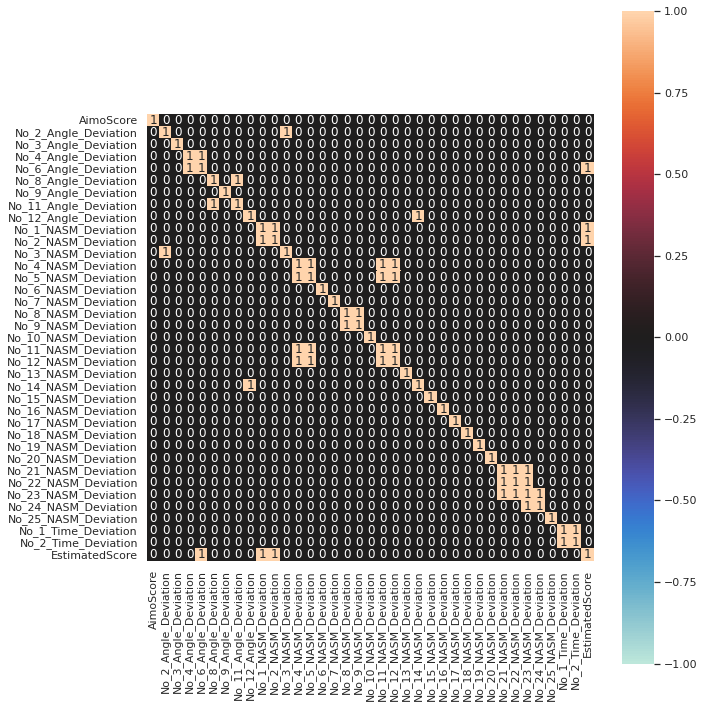

In [ ]:
th = 0.45
fig, ax = plt.subplots(figsize=(10,12))  
corrs = champions.corr()
plot = sns.heatmap((corrs>=th),vmin=-1, vmax=1,center=0, square=True,annot=True,ax=ax)
plt.show()

According to the heatmap these variables have a strong correlation (>= 75%):
 - No_1_Time_Deviation & No_2_Time_Deviation (94%)
 - No_4_NASM_Deviation & No_5_NASM_Deviation (90%)
 - No_8_NASM_Deviation & No_9_NASM_Deviation (87%)
 - No_11_NASM_Deviation & No_12_NASM_Deviation (86%)
 - No_1_NASM_Deviation & No_2_NASM_Deviation (85%)

Correlation between 75% and 45%
 - No_5_NASM_Deviation & No_12_NASM_Deviation (69%)
 - No_4_NASM_Deviation & No_11_NASM_Deviation (68%)
 - No_5_NASM_Deviation & No_11_NASM_Deviation (64%)
 - No_4_NASM_Deviation & No_12_NASM_Deviation (63%)
 - No_21_NASM_Deviation & No_22_NASM_Deviation (63%)
 - No_2_Angle_Deviation & No_3_NASM_Deviation (53%)
 - No_21_NASM_Deviation & No_23_NASM_Deviation (51%)
 - No_12_Angle_Deviation & No_14_NASM_Deviation (49%)
 - No_22_NASM_Deviation & No_23_NASM_Deviation (47%)
 - No_4_Angle_Deviation & No_6_Angle_Deviation (46%)
 - No_8_Angle_Deviation & No_11_Angle_Deviation (46%)
 - No_23_NASM_Deviation & No_24_NASM_Deviation (46%)


## 3.4 Investigating diffrent variable effect on OLS model

### 3.4.1 Check single predictor models

In [ ]:
def checkFit(x):
    Y = champions['AimoScore']
    X = sm.add_constant(x)
    m = sm.OLS(Y, X).fit()    
    return m

th = 0.1

cls = champions.drop(columns=["AimoScore","EstimatedScore"])

target = champions[["AimoScore","EstimatedScore"]]

r = pd.DataFrame({"Column":[],"R2":[],"pValue":[]})

for c in cls.columns.values:
    model = checkFit(champions[c])
    if(model.rsquared > th):
        item = pd.Series({"Column": c, "R2": model.rsquared,"pValue":model.pvalues.iat[1]})
        r = r.append(item,ignore_index=True)
r

,Column,R2,pValue
0,No_12_Angle_Deviation,0.107598,1.024130e-53
1,No_4_NASM_Deviation,0.140209,1.101793e-70
2,No_5_NASM_Deviation,0.176875,1.563020e-90
3,No_10_NASM_Deviation,0.174969,1.767244e-89
4,No_11_NASM_Deviation,0.216803,3.645108e-113
5,No_12_NASM_Deviation,0.237581,2.126796e-125


This predictors improve the R-Square more than 10%
- No_12_Angle_Deviation (11%)
- No_4_NASM_Deviation (14%)
- No_5_NASM_Deviation (18%)
- No_10_NASM_Deviation (17%)
- No_11_NASM_Deviation (22%)
- No_12_NASM_Deviation (23%)

### 3.4.2 Create 3rd Mode

In [ ]:
cols = [
    "No_12_Angle_Deviation",
    "No_4_NASM_Deviation",
    "No_5_NASM_Deviation",
    "No_10_NASM_Deviation",
    "No_11_NASM_Deviation",
    "No_12_NASM_Deviation"  
]
t = sm.add_constant(champions[cols], prepend=False)
model_2 = sm.OLS(champions["AimoScore"],t).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:              AimoScore   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.413
Method:                 Least Squares   F-statistic:                     246.0
Date:                Mon, 15 Feb 2021   Prob (F-statistic):          3.56e-238
Time:                        00:00:49   Log-Likelihood:                 608.37
No. Observations:                2094   AIC:                            -1203.
Df Residuals:                    2087   BIC:                            -1163.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
No_12_Angle_Deviation    -0.16

### 3.4.3 Check last model improvement with interactions with 2 predictors

In [ ]:
def checkFit(x):
    Y = champions['AimoScore']
    X = sm.add_constant(x)
    m = sm.OLS(Y, X).fit()    
    return m


th = 0.3

cls = champions.drop(columns=["AimoScore","EstimatedScore"])

target = champions[["AimoScore","EstimatedScore"]]

r2 = pd.DataFrame({"Column":[],"R2":[],"pValue":[]})



for c in cls.columns.values:
    model = checkFit(champions[c])
    if(model.rsquared > th):
        item = pd.Series({"Column": c, "R2": model.rsquared,"pValue":model.pvalues.iat[1]})
        r2 = r2.append(item,ignore_index=True)
    
    for d in cls.columns.values:
        model = checkFit(champions[c]*champions[d])
        if(model.rsquared > th):
            item = pd.Series({"Column": c+"*"+d, "R2": model.rsquared,"pValue":model.pvalues.iat[1]})
            r2 = r2.append(item,ignore_index=True)
              

In [ ]:
for c in r2[r2["R2"]>0.3]["Column"]:
    print(c)

r2[r2["R2"]>0.3]

No_8_Angle_Deviation*No_12_NASM_Deviation
No_11_Angle_Deviation*No_12_NASM_Deviation
No_5_NASM_Deviation*No_10_NASM_Deviation
No_10_NASM_Deviation*No_5_NASM_Deviation
No_10_NASM_Deviation*No_11_NASM_Deviation
No_10_NASM_Deviation*No_12_NASM_Deviation
No_11_NASM_Deviation*No_10_NASM_Deviation
No_12_NASM_Deviation*No_8_Angle_Deviation
No_12_NASM_Deviation*No_11_Angle_Deviation
No_12_NASM_Deviation*No_10_NASM_Deviation


,Column,R2,pValue
0,No_8_Angle_Deviation*No_12_NASM_Deviation,0.315929,1.016232e-174
1,No_11_Angle_Deviation*No_12_NASM_Deviation,0.317740,6.337608e-176
2,No_5_NASM_Deviation*No_10_NASM_Deviation,0.303357,1.944356e-166
3,No_10_NASM_Deviation*No_5_NASM_Deviation,0.303357,1.944356e-166
4,No_10_NASM_Deviation*No_11_NASM_Deviation,0.320262,1.310756e-177
5,No_10_NASM_Deviation*No_12_NASM_Deviation,0.350188,4.414455e-198
6,No_11_NASM_Deviation*No_10_NASM_Deviation,0.320262,1.310756e-177
7,No_12_NASM_Deviation*No_8_Angle_Deviation,0.315929,1.016232e-174
8,No_12_NASM_Deviation*No_11_Angle_Deviation,0.317740,6.337608e-176
9,No_12_NASM_Deviation*No_10_NASM_Deviation,0.350188,4.414455e-198


### 3.4.4 Create 4th Mode

In [ ]:
cols = [
    "No_8_Angle_Deviation",
    "No_11_Angle_Deviation",
    "No_12_Angle_Deviation",
    "No_4_NASM_Deviation",
    "No_5_NASM_Deviation",
    "No_10_NASM_Deviation",
    "No_11_NASM_Deviation",
    "No_12_NASM_Deviation",
    "No_8_Angle_Deviation*No_12_NASM_Deviation",
    "No_11_Angle_Deviation*No_12_NASM_Deviation",
    "No_5_NASM_Deviation*No_10_NASM_Deviation",
    "No_10_NASM_Deviation*No_11_NASM_Deviation",
    "No_10_NASM_Deviation*No_12_NASM_Deviation"
    ]

champions["No_8_Angle_Deviation*No_12_NASM_Deviation"] = champions["No_8_Angle_Deviation"] * champions["No_12_NASM_Deviation"]
champions["No_11_Angle_Deviation*No_12_NASM_Deviation"] = champions["No_11_Angle_Deviation"] * champions["No_12_NASM_Deviation"]
champions["No_5_NASM_Deviation*No_10_NASM_Deviation"] = champions["No_5_NASM_Deviation"] * champions["No_10_NASM_Deviation"]
champions["No_10_NASM_Deviation*No_11_NASM_Deviation"] = champions["No_10_NASM_Deviation"] * champions["No_11_NASM_Deviation"]
champions["No_10_NASM_Deviation*No_12_NASM_Deviation"] = champions["No_10_NASM_Deviation"] * champions["No_12_NASM_Deviation"]

t = sm.add_constant(champions[cols], prepend=False)
model_3 = sm.OLS(champions["AimoScore"],t).fit()
print(model_3.summary())

                            OLS Regression Results                            
Dep. Variable:              AimoScore   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     142.4
Date:                Mon, 15 Feb 2021   Prob (F-statistic):          7.49e-276
Time:                        00:00:52   Log-Likelihood:                 714.68
No. Observations:                2094   AIC:                            -1401.
Df Residuals:                    2080   BIC:                            -1322.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------

In [ ]:
cols = [
    "No_8_Angle_Deviation",
    "No_11_Angle_Deviation",
    "No_12_Angle_Deviation",
    "No_4_NASM_Deviation",
    "No_5_NASM_Deviation",
    "No_10_NASM_Deviation",
    "No_11_NASM_Deviation",
    "No_12_NASM_Deviation",
    "No_8_Angle_Deviation*No_12_NASM_Deviation",
    "No_11_Angle_Deviation*No_12_NASM_Deviation",
    "No_5_NASM_Deviation*No_10_NASM_Deviation",
    "No_10_NASM_Deviation*No_11_NASM_Deviation",
    "No_10_NASM_Deviation*No_12_NASM_Deviation",
    "No_5_NASM_Deviation*No_10_NASM_Deviation*No_12_NASM_Deviation"
    ]
champions["No_5_NASM_Deviation*No_10_NASM_Deviation*No_12_NASM_Deviation"] = champions["No_5_NASM_Deviation"] * champions["No_10_NASM_Deviation"] * champions["No_12_NASM_Deviation"]

t = sm.add_constant(champions[cols], prepend=False)
model_4 = sm.OLS(champions["AimoScore"],t).fit()
print(model_4.summary())

                            OLS Regression Results                            
Dep. Variable:              AimoScore   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.491
Method:                 Least Squares   F-statistic:                     145.4
Date:                Mon, 15 Feb 2021   Prob (F-statistic):          1.99e-295
Time:                        00:00:52   Log-Likelihood:                 762.90
No. Observations:                2094   AIC:                            -1496.
Df Residuals:                    2079   BIC:                            -1411.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [ ]:
t = sm.add_constant(champions.drop(columns=["AimoScore","EstimatedScore"]), prepend=False)
model_5 = sm.OLS(champions["AimoScore"],t).fit()
print(model_5.summary())

                            OLS Regression Results                            
Dep. Variable:              AimoScore   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     82.95
Date:                Mon, 15 Feb 2021   Prob (F-statistic):               0.00
Time:                        00:00:52   Log-Likelihood:                 1071.6
No. Observations:                2094   AIC:                            -2059.
Df Residuals:                    2052   BIC:                            -1822.
Df Model:                          41                                         
Covariance Type:            nonrobust                                         
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

## 3.5 Try and error aproch based on OLS summary

### 3.5.1 Read, Remove Duplicates, and Remove Outliers

In [ ]:
# Read
url = "./AimoScore_WeakLink_big_scores.xls"
champions = pd.read_excel(url)

# Remove Duplicates
champions = champions.drop(
    columns=[
        "No_1_Angle_Deviation",
        "No_5_Angle_Deviation",
        "No_7_Angle_Deviation",
        "No_10_Angle_Deviation",
        "No_13_Angle_Deviation"
    ]
)

# Remove Outliers
import scipy.stats as stats
data = champions
z = np.abs(stats.zscore(data))
fData = data[(z < 2.75).all(axis=1)]

In [ ]:
champions["A4*N11"] = champions["No_4_Angle_Deviation"] * champions["No_11_NASM_Deviation"]
champions["A8*N12"] = champions["No_8_Angle_Deviation"] * champions["No_12_NASM_Deviation"]
champions["N2*N20"] = champions["No_2_NASM_Deviation"] * champions["No_20_NASM_Deviation"]
champions["N12*N13"] = champions["No_12_NASM_Deviation"] * champions["No_13_NASM_Deviation"]
champions["N12*N15"] = champions["No_12_NASM_Deviation"] * champions["No_15_NASM_Deviation"]

champions["N12*N16"] = champions["No_12_NASM_Deviation"] * champions["No_16_NASM_Deviation"]
champions["N12*N20"] = champions["No_12_NASM_Deviation"] * champions["No_20_NASM_Deviation"]
champions["N12*N20*N22"] = champions["No_12_NASM_Deviation"] * champions["No_20_NASM_Deviation"] * champions["No_22_NASM_Deviation"]
champions["N12*N20*N19"] = champions["No_12_NASM_Deviation"] * champions["No_20_NASM_Deviation"] * champions["No_19_NASM_Deviation"]
champions["N12*N20*N19*N16"] = champions["No_12_NASM_Deviation"] * champions["No_20_NASM_Deviation"] * champions["No_19_NASM_Deviation"]* champions["No_16_NASM_Deviation"]

champions["N12*N23"] = champions["No_12_NASM_Deviation"] * champions["No_23_NASM_Deviation"]

champions["N21*N24"] = champions["No_21_NASM_Deviation"] * champions["No_24_NASM_Deviation"]
champions["T1*N2"] = champions["No_1_Time_Deviation"] * champions["No_2_Time_Deviation"]

champions["T1*N2"] = champions["No_1_Time_Deviation"] * champions["No_2_NASM_Deviation"]
champions["T1*N13"] = champions["No_1_Time_Deviation"] * champions["No_13_NASM_Deviation"]
champions["T1*N2"] = champions["No_1_Time_Deviation"] * champions["No_2_Angle_Deviation"]
champions["T1*N5"] = champions["No_1_Time_Deviation"] * champions["No_5_NASM_Deviation"]
champions["T1*N18"] = champions["No_1_Time_Deviation"] * champions["No_18_NASM_Deviation"]
champions["N5*N10*N12"] = champions["No_5_NASM_Deviation"] * champions["No_10_NASM_Deviation"] * champions["No_12_NASM_Deviation"]
champions["N8*N12"] = champions["No_8_Angle_Deviation"] * champions["No_12_NASM_Deviation"]
champions["N5*N10*N12*N15"] = champions["No_5_NASM_Deviation"] * champions["No_10_NASM_Deviation"] * champions["No_12_NASM_Deviation"] * champions["No_15_NASM_Deviation"]

champions["A11*N12"] = champions["No_11_Angle_Deviation"] * champions["No_12_NASM_Deviation"]
champions["N10*N11*N12"] = champions["No_10_NASM_Deviation"] * champions["No_11_NASM_Deviation"] * champions["No_12_NASM_Deviation"]
champions["N8*N11"] = champions["No_8_NASM_Deviation"] * champions["No_11_NASM_Deviation"]
champions["N8*N15"] = champions["No_8_NASM_Deviation"] * champions["No_15_NASM_Deviation"]
champions["N15*N20"] = champions["No_15_NASM_Deviation"] * champions["No_20_NASM_Deviation"]
champions["N14*N15*N20*N21"] = champions["No_14_NASM_Deviation"] *champions["No_15_NASM_Deviation"] * champions["No_20_NASM_Deviation"] * champions["No_21_NASM_Deviation"]

champions["N5*N10"] = champions["No_5_NASM_Deviation"] * champions["No_10_NASM_Deviation"]

champions["N5**2"] = champions["No_5_NASM_Deviation"] ** 2
champions["N8**2"] = champions["No_8_NASM_Deviation"] ** 2

champions["N10**2"] = champions["No_10_NASM_Deviation"] ** 2

champions["N11**2"] = champions["No_11_NASM_Deviation"] ** 2

champions["N10**3"] = champions["No_10_NASM_Deviation"] ** 3
champions["N8**"] = champions["No_8_NASM_Deviation"] ** 3

champions["N11**3"] = champions["No_11_NASM_Deviation"] ** 3

champions["N8**4"] = champions["No_8_NASM_Deviation"] ** 4

champions["N8**5"] = champions["No_8_NASM_Deviation"] ** 5

champions["N10*N11"] = champions["No_10_NASM_Deviation"] * champions["No_11_NASM_Deviation"]
champions["N5*N14"] = champions["No_5_NASM_Deviation"] * champions["No_14_NASM_Deviation"]
champions["N20*N24"] = champions["No_20_NASM_Deviation"] * champions["No_24_NASM_Deviation"]
champions["N21*N23"] = champions["No_21_NASM_Deviation"] * champions["No_23_NASM_Deviation"]
champions["T1*N21*N23"] = champions["No_1_Time_Deviation"] * champions["N21*N23"]
champions["T1*N21*N23*N12"] = champions["No_1_Time_Deviation"] * champions["N21*N23"] * champions["No_12_NASM_Deviation"]

champions["T1*N21*N23*N2*N5"] = champions["No_1_Time_Deviation"] * champions["N21*N23"]*champions["No_2_NASM_Deviation"] * champions["No_5_NASM_Deviation"]
champions["N20*N16"] = champions["No_20_NASM_Deviation"] * champions["No_16_NASM_Deviation"]
champions["N20*N16*N19"] = champions["No_20_NASM_Deviation"] * champions["No_16_NASM_Deviation"] * champions["No_19_NASM_Deviation"]

champions["N1*N2*N4*N5"] = champions["No_1_NASM_Deviation"] * champions["No_2_NASM_Deviation"] *champions["No_4_NASM_Deviation"] * champions["No_5_NASM_Deviation"]
champions["N12*N6"] = champions["No_12_NASM_Deviation"] * champions["No_6_NASM_Deviation"]
champions["N12*N7"] = champions["No_12_NASM_Deviation"] * champions["No_7_NASM_Deviation"]
champions["N12**2"] = champions["No_12_NASM_Deviation"] ** 2
champions["N12**3"] = champions["No_12_NASM_Deviation"] ** 3
champions["N12**4"] = champions["No_12_NASM_Deviation"] ** 4
champions["N12**5"] = champions["No_12_NASM_Deviation"] ** 5
champions["N12**6"] = champions["No_12_NASM_Deviation"] ** 6

champions["N15**3"] = champions["No_15_NASM_Deviation"] **3
champions["N20**3"] = champions["No_20_NASM_Deviation"] **3



temp = champions.drop(columns=[
    "AimoScore","EstimatedScore",
    "No_4_Angle_Deviation",
    "No_14_NASM_Deviation",
    "No_4_NASM_Deviation",
    "No_5_NASM_Deviation",
    "No_21_NASM_Deviation",
    "No_24_NASM_Deviation",
    "No_25_NASM_Deviation",
    "No_10_NASM_Deviation",
    "No_11_NASM_Deviation",
    "No_13_NASM_Deviation",
    "No_2_Time_Deviation"
])


t = sm.add_constant(temp, prepend=False)
model_6 = sm.OLS(champions["AimoScore"],t).fit()
model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              AimoScore   R-squared:                       0.716
Model:                            OLS   Adj. R-squared:                  0.705
Method:                 Least Squares   F-statistic:                     65.86
Date:                Mon, 15 Feb 2021   Prob (F-statistic):               0.00
Time:                        00:00:53   Log-Likelihood:                 1364.6
No. Observations:                2094   AIC:                            -2573.
Df Residuals:                    2016   BIC:                            -2133.
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
No_2_Angle_Deviation      0.0694      0.024      2.935      0.003       0.023       0.116
No_3_Angle_Deviation     -0.1095      0.016     -6.688      0.000      -0.142      -0.077
No_6_Angle_Deviation     -0.0392      0.015     -2.630      0.009      -0.068      -0.010
No_8_Angle_Deviation     -0.2489      0.065     -3.802      0.000      -0.377      -0.121
No_9_Angle_Deviation     -0.0334      0.013     -2.528      0.012      -0.059      -0.007
No_11_Angle_Deviation     0.2708      0.089      3.059      0.002       0.097       0.444
No_12_Angle_Deviation    -0.0683      0.014     -5.051      0.000      -0.095      -0.042
No_1_NASM_Deviation      -0.0393      0.024     -1.660      0.097      -0.086       0.007
No_2_NASM_Deviation       0.2410      0.096      2.505      0.012       0.052       0.430
No_3_NASM_Deviation      -0.0749      0.015     -4.974      0.000      -0.104      -0.045
No_6_NASM_Deviation      -0.2735      0.052     -5.230      0.000      -0.376      -0.171
No_7_NASM_Deviation      -0.2793      0.034     -8.107      0.000      -0.347      -0.212
No_8_NASM_Deviation       9.3142     15.944      0.584      0.559     -21.955      40.583
No_9_NASM_Deviation      -0.1502      0.027     -5.485      0.000      -0.204      -0.097
No_12_NASM_Deviation   -125.0014     42.014     -2.975      0.003    -207.397     -42.605
No_15_NASM_Deviation     -0.5598      0.165     -3.389      0.001      -0.884      -0.236
No_16_NASM_Deviation      0.3343      0.201      1.663      0.096      -0.060       0.728
No_17_NASM_Deviation     -0.2762      0.018    -15.619      0.000      -0.311      -0.242
No_18_NASM_Deviation      0.0706      0.038      1.879      0.060      -0.003       0.144
No_19_NASM_Deviation      0.3135      0.142      2.213      0.027       0.036       0.591
No_20_NASM_Deviation     -0.4344      0.363     -1.198      0.231      -1.146       0.277
No_22_NASM_Deviation     -0.1626      0.067     -2.413      0.016      -0.295      -0.030
No_23_NASM_Deviation      0.2788      0.174      1.603      0.109      -0.062       0.620
No_1_Time_Deviation       0.2971      0.068      4.371      0.000       0.164       0.430
A4*N11                   -0.0615      0.027     -2.281      0.023      -0.114      -0.009
A8*N12                    0.1700      0.059      2.899      0.004       0.055       0.285
N2*N20                   -0.4191      0.134     -3.125      0.002      -0.682      -0.156
N12*N13                   0.1488      0.072      2.058      0.040       0.007       0.291
N12*N15                   0.3818      0.128      2.989      0.003       0.131       0.632
N12*N16                  -1.1582      0.301     -3.848      0.000      -1.748      -0.568
N12*N20                  -0.7834      0.273     -2.869      0.004      -1.319      -0.248
N12*N20*N22            

## 5 ANOVA Test

In [ ]:
from statsmodels.stats.api import anova_lm

at = anova_lm(model_base,model_5,model_6)
at

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2058.0,48.108413,0.0,NaN,NaN,NaN
1,2052.0,44.056969,6.0,4.051444,40.876467,3.013170e-47
2,2016.0,33.302418,36.0,10.754551,18.084418,4.722356e-97


## 6 Train Model with 80% of given data and prediction

In [ ]:
from sklearn.model_selection import train_test_split

# Train / Test Portion Percentage = 80%
TPP = 0.8

# target variable and predictors
X = temp = champions.drop(columns=[
    "AimoScore","EstimatedScore",
    "No_4_Angle_Deviation",
    "No_14_NASM_Deviation",
    "No_4_NASM_Deviation",
    "No_5_NASM_Deviation",
    "No_21_NASM_Deviation",
    "No_24_NASM_Deviation",
    "No_25_NASM_Deviation",
    "No_10_NASM_Deviation",
    "No_11_NASM_Deviation",
    "No_13_NASM_Deviation",
    "No_2_Time_Deviation"
])
y = champions["AimoScore"]

# datasets for trainig and testing the model 
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size = TPP)

## 6.1 StatsModels OLS

In [ ]:
# Creating the model and predicting with StatsModels
model = sm.OLS(train_y, train_X)
model = model.fit()
predictions = model.predict(test_X)

## 6.2 Prediction Result

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error

RMSE = np.sqrt(mean_squared_error(test_y, predictions))
r2 = r2_score(test_y, predictions)
print("RMSE (Root Mean Squared Error)", RMSE)
print("R-squared", r2)

RMSE (Root Mean Squared Error) 0.12325461689964656
R-squared 0.7145067601191422


Pair plot to visualize the predictions vs original values

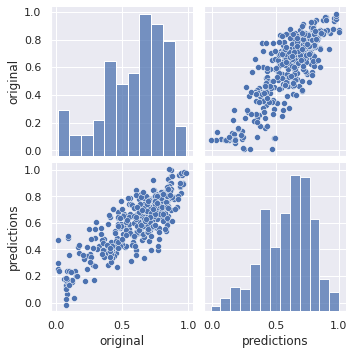

In [ ]:
testResult = pd.DataFrame({"original":test_y,"predictions":predictions})
sns.pairplot(testResult)
plt.show()